In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!ls "/content/drive/My Drive/Colab Notebooks"

'2 -BoW keras Exp2.ipynb'	      Assignment1-6Dropout-i.ipynb
 A2Exp2.ipynb			      Assignment1-basic.ipynb
 A2Exp4.ipynb			     'BoW keras Exp2.ipynb'
 Assignment1-1epoch-ii.ipynb	     'BOW Keras.ipynb'
 Assignment1-1epoch-i.ipynb	      DenseNet
 Assignment1-2batchsize-ii.ipynb     'Example 1.ipynb'
 Assignment1-2batchsize-i.ipynb      'Exp_3 Watson_API.ipynb'
 Assignment-1-3aNeurons-ii.ipynb     'Exp_4 Watson_API.ipynb'
 Assignment-1-3aNeurons-i.ipynb       fdgd.py
 Assignment1-3bLayers-ii.ipynb	      mod2.csv
 Assignment1-3bLayers-i.ipynb	      mod.csv
 Assignment1-4LearningRate-ii.ipynb  'Part A base.ipynb'
 Assignment1-4LearningRate-i.ipynb   'Part A.ipynb'
 Assignment1-5Activation-ii.ipynb     review_polarity.tar.gz
 Assignment1-5Activation-i.ipynb      tiny-imagenet-200.zip
 Assignment1-6Dropout-ii.ipynb	      txt_sentoken


In [38]:
from string import punctuation
from os import listdir
from collections import Counter
from nltk.corpus import stopwords

from keras.preprocessing.text import Tokenizer
from numpy import array

import pandas as pd

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from pandas import DataFrame
from matplotlib import pyplot

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
def load_doc(filename):
	file = open(filename, 'r')
	text = file.read()
	file.close()
	return text

In [0]:
def clean_doc(doc):
	tokens = doc.split()
	table = str.maketrans('', '', punctuation)
	tokens = [w.translate(table) for w in tokens]
	tokens = [word for word in tokens if word.isalpha()]
	stop_words = set(stopwords.words('english'))
	tokens = [w for w in tokens if not w in stop_words]
	tokens = [word for word in tokens if len(word) > 1]
	return tokens

In [0]:
def add_doc_to_vocab(filename, vocab):
	doc = load_doc(filename)
	tokens = clean_doc(doc)
	vocab.update(tokens)

In [0]:
def process_docs(directory, vocab):
	for filename in listdir(directory):
		if filename.startswith('cv9'):
			continue
		path = directory + '/' + filename
		add_doc_to_vocab(path, vocab)

In [0]:
vocab = Counter()

In [0]:
process_docs('/content/drive/My Drive/Colab Notebooks/txt_sentoken/pos', vocab)
process_docs('/content/drive/My Drive/Colab Notebooks/txt_sentoken/neg', vocab)

In [10]:
print(len(vocab))
print(vocab.most_common(50))

44276
[('film', 7983), ('one', 4946), ('movie', 4826), ('like', 3201), ('even', 2262), ('good', 2080), ('time', 2041), ('story', 1907), ('films', 1873), ('would', 1844), ('much', 1824), ('also', 1757), ('characters', 1735), ('get', 1724), ('character', 1703), ('two', 1643), ('first', 1588), ('see', 1557), ('way', 1515), ('well', 1511), ('make', 1418), ('really', 1407), ('little', 1351), ('life', 1334), ('plot', 1288), ('people', 1269), ('could', 1248), ('bad', 1248), ('scene', 1241), ('movies', 1238), ('never', 1201), ('best', 1179), ('new', 1140), ('scenes', 1135), ('man', 1131), ('many', 1130), ('doesnt', 1118), ('know', 1092), ('dont', 1086), ('hes', 1024), ('great', 1014), ('another', 992), ('action', 985), ('love', 977), ('us', 967), ('go', 952), ('director', 948), ('end', 946), ('something', 945), ('still', 936)]


In [11]:
min_occurane = 2
tokens = [k for k,c in vocab.items() if c >= min_occurane]
print(len(tokens))

25767


In [0]:
def save_list(lines, filename):
	data = '\n'.join(lines)
	file = open(filename, 'w')
	file.write(data)
	file.close()

save_list(tokens, 'vocab.txt')

In [13]:
!ls

drive  sample_data  vocab.txt


In [0]:
def doc_to_line(filename, vocab):
	doc = load_doc(filename)
	tokens = clean_doc(doc)
	tokens = [w for w in tokens if w in vocab]
	return ' '.join(tokens)

In [0]:
def process_docs(directory, vocab):
	lines = list()
	for filename in listdir(directory):
		if filename.startswith('cv9'):
			continue
		path = directory + '/' + filename
		line = doc_to_line(path, vocab)
		lines.append(line)
	return lines

In [0]:
vocab_filename = 'vocab.txt'
vocab = load_doc(vocab_filename)
vocab = vocab.split()
vocab = set(vocab)

In [17]:
vocab

{'takes',
 'orlando',
 'helicopters',
 'faux',
 'decks',
 'enticing',
 'sidetracks',
 'harkers',
 'pillpoppin',
 'marlowe',
 'abandonment',
 'dann',
 'texan',
 'behindthescenes',
 'naming',
 'parodying',
 'shallowness',
 'descriptions',
 'mark',
 'vicellous',
 'gazarra',
 'morons',
 'morass',
 'stumble',
 'hollow',
 'spoiled',
 'surely',
 'artificiality',
 'sunhill',
 'proper',
 'tormey',
 'harvard',
 'website',
 'internet',
 'cartoonish',
 'autistic',
 'irate',
 'fukienese',
 'shoeless',
 'doctor',
 'data',
 'certificate',
 'united',
 'taye',
 'exira',
 'dip',
 'hugs',
 'tutelage',
 'evaporated',
 'buys',
 'endeavors',
 'bumping',
 'ally',
 'responding',
 'bunz',
 'rely',
 'topbilled',
 'nebbish',
 'washingtons',
 'harvest',
 'insectopia',
 'bresslaw',
 'comedically',
 'granted',
 'listings',
 'rowan',
 'overdirecting',
 'worthless',
 'richie',
 'blotter',
 'andrzej',
 'craven',
 'erotically',
 'harald',
 'marital',
 'cusack',
 'vague',
 'mishap',
 'robocops',
 'overboard',
 'coed',
 

In [18]:
positive_lines = process_docs('/content/drive/My Drive/Colab Notebooks/txt_sentoken/pos', vocab)
negative_lines = process_docs('/content/drive/My Drive/Colab Notebooks/txt_sentoken/neg', vocab)

print(len(positive_lines), len(negative_lines))

900 900


In [0]:
tokenizer = Tokenizer()

In [0]:
docs = positive_lines + negative_lines
tokenizer.fit_on_texts(docs)

In [21]:
Xtrain = tokenizer.texts_to_matrix(docs, mode='freq')
print(Xtrain.shape)

(1800, 25768)


In [0]:
def process_docs(directory, vocab, is_trian):
	lines = list()
	for filename in listdir(directory):
		if is_trian and filename.startswith('cv9'):
			continue
		if not is_trian and not filename.startswith('cv9'):
			continue
		path = directory + '/' + filename
		line = doc_to_line(path, vocab)
		lines.append(line)
	return lines

In [0]:
positive_lines = process_docs('/content/drive/My Drive/Colab Notebooks/txt_sentoken/pos', vocab, False)
negative_lines = process_docs('/content/drive/My Drive/Colab Notebooks/txt_sentoken/neg', vocab, False)
test_docs = negative_lines + positive_lines
docs = negative_lines + positive_lines

In [0]:
positive_lines = process_docs('/content/drive/My Drive/Colab Notebooks/txt_sentoken/pos', vocab, True)
negative_lines = process_docs('/content/drive/My Drive/Colab Notebooks/txt_sentoken/neg', vocab, True)

train_docs = negative_lines + positive_lines

In [25]:
Xtest = tokenizer.texts_to_matrix(docs, mode='freq')
print(Xtest.shape)

(200, 25768)


In [0]:
n_words = Xtest.shape[1]

In [0]:
ytrain = array([0 for _ in range(900)] + [1 for _ in range(900)])
ytest = array([0 for _ in range(100)] + [1 for _ in range(100)])

In [0]:
model = Sequential()
model.add(Dense(50, input_shape=(n_words,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [62]:
model.fit(Xtrain, ytrain, epochs=50, verbose=2)

Epoch 1/50
 - 1s - loss: 0.6920 - acc: 0.6294
Epoch 2/50
 - 0s - loss: 0.6844 - acc: 0.6567
Epoch 3/50
 - 0s - loss: 0.6695 - acc: 0.8083
Epoch 4/50
 - 0s - loss: 0.6474 - acc: 0.8189
Epoch 5/50
 - 0s - loss: 0.6161 - acc: 0.9128
Epoch 6/50
 - 0s - loss: 0.5784 - acc: 0.9428
Epoch 7/50
 - 0s - loss: 0.5366 - acc: 0.9494
Epoch 8/50
 - 0s - loss: 0.4935 - acc: 0.9500
Epoch 9/50
 - 0s - loss: 0.4512 - acc: 0.9522
Epoch 10/50
 - 0s - loss: 0.4101 - acc: 0.9600
Epoch 11/50
 - 0s - loss: 0.3732 - acc: 0.9706
Epoch 12/50
 - 0s - loss: 0.3376 - acc: 0.9722
Epoch 13/50
 - 0s - loss: 0.3062 - acc: 0.9744
Epoch 14/50
 - 0s - loss: 0.2783 - acc: 0.9806
Epoch 15/50
 - 0s - loss: 0.2525 - acc: 0.9833
Epoch 16/50
 - 0s - loss: 0.2286 - acc: 0.9867
Epoch 17/50
 - 0s - loss: 0.2080 - acc: 0.9889
Epoch 18/50
 - 0s - loss: 0.1895 - acc: 0.9911
Epoch 19/50
 - 0s - loss: 0.1729 - acc: 0.9933
Epoch 20/50
 - 0s - loss: 0.1572 - acc: 0.9933
Epoch 21/50
 - 0s - loss: 0.1436 - acc: 0.9944
Epoch 22/50
 - 0s - lo

In [31]:
loss, acc = model.evaluate(Xtest, ytest, verbose=0)
print('Test Accuracy: %f' % (acc*100))

Test Accuracy: 9.000000


In [0]:
def prepare_data(train_docs, test_docs, mode):
	tokenizer = Tokenizer()
	tokenizer.fit_on_texts(train_docs)
	Xtrain = tokenizer.texts_to_matrix(train_docs, mode=mode)
	Xtest = tokenizer.texts_to_matrix(test_docs, mode=mode)
	return Xtrain, Xtest

In [0]:
def evaluate_mode(Xtrain, ytrain, Xtest, ytest):
	scores = list()
	n_repeats = 30
	n_words = Xtest.shape[1]
	for i in range(n_repeats):
		model = Sequential()
		model.add(Dense(50, input_shape=(1000,), activation='relu'))
		model.add(Dense(1, activation='sigmoid'))
		model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
		model.fit(Xtrain, ytrain, epochs=50, verbose=2)
		loss, acc = model.evaluate(Xtest, ytest, verbose=0)
		scores.append(acc)
		print('%d accuracy: %s' % ((i+1), acc))
	return scores

In [0]:
modes = ['binary', 'count', 'tfidf', 'freq']
results = DataFrame()
for mode in modes:
	Xtrain, Xtest = prepare_data(train_docs, test_docs, mode)
	results[mode] = evaluate_mode(Xtrain, ytrain, Xtest, ytest)
  
print(results.describe())

results.boxplot()
pyplot.show()

Epoch 1/50
 - 1s - loss: 0.4890 - acc: 0.7744
Epoch 2/50
 - 0s - loss: 0.0692 - acc: 0.9922
Epoch 3/50
 - 0s - loss: 0.0178 - acc: 1.0000
Epoch 4/50
 - 1s - loss: 0.0069 - acc: 1.0000
Epoch 5/50
 - 0s - loss: 0.0035 - acc: 1.0000
Epoch 6/50
 - 0s - loss: 0.0021 - acc: 1.0000
Epoch 7/50
 - 0s - loss: 0.0014 - acc: 1.0000
Epoch 8/50
 - 0s - loss: 9.4488e-04 - acc: 1.0000
Epoch 9/50
 - 0s - loss: 6.7673e-04 - acc: 1.0000
Epoch 10/50
 - 0s - loss: 5.0082e-04 - acc: 1.0000
Epoch 11/50
 - 0s - loss: 3.8899e-04 - acc: 1.0000
Epoch 12/50
 - 0s - loss: 3.1103e-04 - acc: 1.0000
Epoch 13/50
 - 0s - loss: 2.5439e-04 - acc: 1.0000
Epoch 14/50
 - 0s - loss: 2.1165e-04 - acc: 1.0000
Epoch 15/50
 - 0s - loss: 1.7887e-04 - acc: 1.0000
Epoch 16/50
 - 0s - loss: 1.5324e-04 - acc: 1.0000
Epoch 17/50
 - 0s - loss: 1.3245e-04 - acc: 1.0000
Epoch 18/50
 - 0s - loss: 1.1580e-04 - acc: 1.0000
Epoch 19/50
 - 0s - loss: 1.0193e-04 - acc: 1.0000
Epoch 20/50
 - 0s - loss: 9.0369e-05 - acc: 1.0000
Epoch 21/50
 - 0s

In [0]:
model.save('model_bow.h5')

In [0]:
def predict_sentiment(review, vocab, tokenizer, model):
	tokens = clean_doc(review)
	tokens = [w for w in tokens if w in vocab]
	line = ' '.join(tokens)
	encoded = tokenizer.texts_to_matrix([line], mode='freq')
	yhat = model.predict(encoded, verbose=0)
	return round(yhat[0,0])

In [35]:
text = 'Best movie ever!'
print(predict_sentiment(text, vocab, tokenizer, model))


0.0


In [36]:
text = 'This is a bad movie.'
print(predict_sentiment(text, vocab, tokenizer, model))

1.0


### Transfer Learning

In [0]:
data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/mod2.csv")
data = data.drop(data.columns[0], axis=1)
data = data.dropna()
X = data['text'].values
y = data['sentiment'].values
# data = data.drop(['sentiment'], axis = 1)
# data.head(5)

In [47]:
data['sentiment'].value_counts()

positive    655
negative    157
Name: sentiment, dtype: int64

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=123, stratify=y)

In [43]:
y_test.shape

(163,)

In [0]:
from keras.models import load_model
model = load_model('model_bow.h5')

In [50]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                1288450   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 1,288,501
Trainable params: 1,288,501
Non-trainable params: 0
_________________________________________________________________


In [51]:
data['sentiment'] = data['sentiment'].replace({'positive': 0,'negative':1})
data.head()

,sentiment,text
0,0,"Thank you, Ellen. We have a strong 2018, with ..."
1,0,Stock-based compensation totaled $2.3 billion....
2,0,[Operator Instructions]. Our first question wi...
3,0,"Hey, thanks. So I guess the question I have an..."
4,0,I'll take that one Karen. Well obviously a lot...


In [0]:
X = data['text'].values
y = data['sentiment'].values

In [0]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np
#tk = Tokenizer(lower = True)
#tk.fit_on_texts(X)
#X_seq = tk.texts_to_sequences(X)
#X_pad = pad_sequences(X_seq, maxlen=1000, padding='post')
tokenizer = Tokenizer(num_words=25768)
edgar_x_test_bow = tokenizer.texts_to_matrix(data['text'].tolist(), mode='freq')
edgar_test_labels = np.asarray(data['sentiment'])

In [64]:
score = model.evaluate(edgar_x_test_bow, edgar_test_labels, verbose=1)
print('Test Loss:', score[0], 'Test Accuracy:', score[1])

812/812 [==============================] - 0s 242us/step
Test Loss: 0.6958763846035662 Test Accuracy: 0.1933497536945813


In [65]:
preds = model.predict(edgar_x_test_bow,verbose=1)

812/812 [==============================] - 0s 217us/step


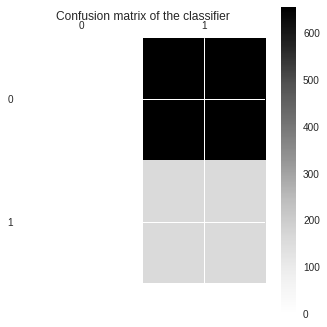

In [66]:
import matplotlib.pyplot as pl
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds.round())
pl.matshow(cm)
pl.title('Confusion matrix of the classifier')
pl.colorbar()
pl.show()

In [67]:
print(cm)

[[  0 655]
 [  0 157]]
